In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
train_dir = r"C:\Users\Chaitanya Raut\Desktop\maindata\train"
test_dir = r"C:\Users\Chaitanya Raut\Desktop\maindata\test"


In [ ]:
train_ds = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode="binary" 
)

test_ds = image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode="binary"
)

Found 24804 files belonging to 2 classes.
Found 6719 files belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2)
])

model = Sequential([
    data_augmentation,

    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.4), 
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])
model.build(input_shape=(None, 224, 224, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_10 (Ba  (None, 112, 112, 64)     

In [14]:
epochs = 5
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs,
)

Epoch 1/5
776/776 [==============================] - 700s 902ms/step - loss: 0.3145 - accuracy: 0.8706 - val_loss: 0.3968 - val_accuracy: 0.8202
Epoch 2/5
776/776 [==============================] - 671s 864ms/step - loss: 0.2706 - accuracy: 0.8893 - val_loss: 0.3331 - val_accuracy: 0.8744
Epoch 3/5
776/776 [==============================] - 752s 969ms/step - loss: 0.2444 - accuracy: 0.9022 - val_loss: 0.4467 - val_accuracy: 0.8073
Epoch 4/5
776/776 [==============================] - 812s 1s/step - loss: 0.2116 - accuracy: 0.9156 - val_loss: 0.3020 - val_accuracy: 0.8814
Epoch 5/5
776/776 [==============================] - 751s 967ms/step - loss: 0.1837 - accuracy: 0.9280 - val_loss: 0.3463 - val_accuracy: 0.8549


In [15]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

210/210 [==============================] - 37s 176ms/step - loss: 0.3463 - accuracy: 0.8549
Test Accuracy: 85.49%


1/1 [==============================] - 0s 86ms/step


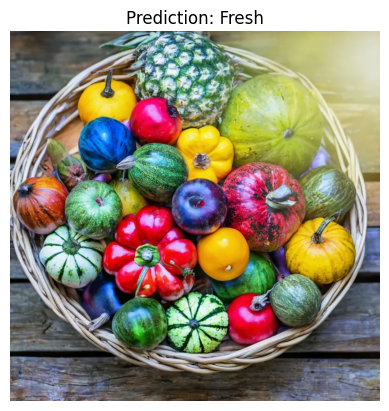

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0) / 255.0  # Normalize

    prediction = model.predict(image)
    label = "Fresh" if prediction[0] > 0.5 else "Rotten"
    
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {label}")
    plt.axis("off")
    plt.show()

predict_image(r"C:\Users\Chaitanya Raut\Desktop\fruits.jpg")

In [18]:
model.save("food_classifier.h5")

c:\WebDevelopment\Bowser-Stack-LOC\flask\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
